In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from prophet import Prophet
import statsmodels.api as sm

# import warnings
# warnings.simplefilter('ignore')


sns.set_style('darkgrid')
%matplotlib inline

## Comparison SARIMA x auto_arima

`Comparison between a model generated by auto_arima and a SARIMA model with the same parameters`

In [2]:
complete_dataset = pd.read_csv('./../data/owid-covid-data.csv')
interest_columns = ['location', 'date', 'new_cases', 'new_cases_smoothed']
dataset = complete_dataset[interest_columns].copy()
dataset = dataset.set_index('date')

# Filter only world data

cases = dataset[dataset['location'] == 'World']

In [3]:
train_size = 400
y = cases['new_cases']
train, test = train_test_split(y, train_size=train_size)

In [8]:
#%%timeit
auto_arima = pm.auto_arima(train, seasonal=True, m=12)
print("Auto Arima Fit")

Auto Arima Fit


`42.8 s ± 791 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)`


In [48]:
# %%timeit
sarimax = sm.tsa.SARIMAX(
    train, 
    order=auto_arima.order, 
    seasonal_order=auto_arima.seasonal_order
).fit()
print("SARIMAX Fit")

SARIMAX Fit


`3.62 s ± 72.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)`

In [41]:
steps = 20
am_forecast = auto_arima.predict(steps)
sa_forecast = sarimax.forecast(steps=steps)

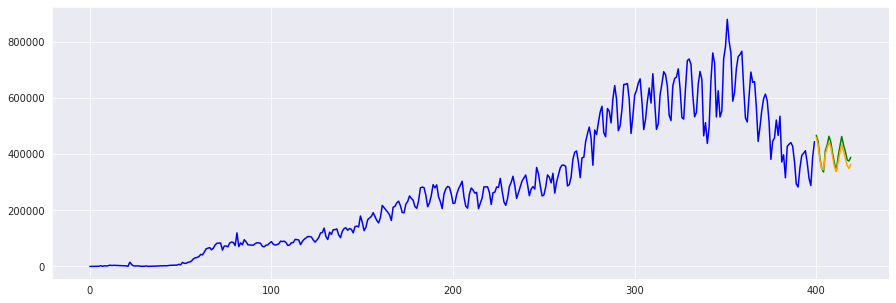

In [46]:
plt.figure(figsize=(15,5))
x = np.arange(y.shape[0])
f = np.arange(train_size + steps)
plt.plot(x[:train_size], train, c='blue')
plt.plot(f[train_size:], am_forecast, c='green')
plt.plot(f[train_size:], sa_forecast, c='orange')
# plt.plot(x[train_size:], test, c='black')
plt.show()

## SARIMAX Summary

In [49]:
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          new_cases   No. Observations:                  400
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 12)   Log Likelihood               -4724.364
Date:                            Sat, 24 Apr 2021   AIC                           9466.729
Time:                                    10:51:51   BIC                           9502.629
Sample:                                01-22-2020   HQIC                          9480.947
                                     - 02-24-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1842      0.033     35.387      0.000       1.119       1.250
ar.L2         -0.8367      0.029    -28.978      0.000      -0.893      -0.780
ma.L1         -1.4540      0.034    -42.911      0.000      -1.520      -1.388
ma.L2          0.7861      0.035     22.666      0.000       0.718       0.854
ar.S.L12      -0.4063      0.174     -2.336      0.019      -0.747      -0.065
ar.S.L24      -0.9742      0.082    -11.901      0.000      -1.135      -0.814
ma.S.L12       0.3646      0.202      1.806      0.071      -0.031       0.760
ma.S.L24       0.9192      0.138      6.664      0.000       0.649       1.190
sigma2        1.3e+09   2.07e-10   6.27e+18      0.000     1.3e+09     1.3e+09
===================================================================================
Ljung-Box (L1) (Q):                   8.10   Jarque-Bera (JB):               337.81
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              38.72   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.35e+34. Standard errors may be unstable.
"""

(2, 0, 2, 12)